<a href="https://colab.research.google.com/github/dellavecchiaemiliano/Quantitative_financial_modelling/blob/main/QFMproject_GROUP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STYLIZED FACTS OF FINANCIAL TIME SERIES**

# **Importing library**


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import scipy.stats as stats
import yfinance as yahooFinance
import datetime
from scipy.stats import genpareto
from scipy.stats import norm
from scipy import stats, optimize
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

# **Downloading data from Yahoo Finance**

In [ ]:
#IMPORTING FINANCIAL DATA FROM YAHOO FINANCE 
start = datetime.datetime(1984, 1, 3)
end = datetime.datetime(2022, 12, 30)
FTSE = yahooFinance.Ticker("^FTSE")
df = (FTSE.history(start=start,
                               end=end)['Close'])
df.dropna()
df

Date
1984-01-03 00:00:00+00:00     997.500000
1984-01-04 00:00:00+00:00     998.599976
1984-01-05 00:00:00+00:00    1015.799988
1984-01-06 00:00:00+00:00    1029.000000
1984-01-09 00:00:00+00:00    1034.599976
                                ...     
2022-12-21 00:00:00+00:00    7497.299805
2022-12-22 00:00:00+00:00    7469.299805
2022-12-23 00:00:00+00:00    7473.000000
2022-12-28 00:00:00+00:00    7497.200195
2022-12-29 00:00:00+00:00    7512.700195
Name: Close, Length: 9850, dtype: float64

In [ ]:
#IMPORTING INTRADAY DATA
tickerF = "^FTSE"
period = "1d"
interval = "5m"
intraday = yahooFinance.download("^FTSE", period=period, interval=interval)
intraday = intraday["Close"]
intraday

[*********************100%***********************]  1 of 1 completed


Datetime
2023-01-13 08:00:00+00:00    7823.830078
2023-01-13 08:05:00+00:00    7825.850098
2023-01-13 08:10:00+00:00    7827.609863
2023-01-13 08:15:00+00:00    7831.830078
2023-01-13 08:20:00+00:00    7837.819824
                                ...     
2023-01-13 16:10:00+00:00    7846.910156
2023-01-13 16:15:00+00:00    7846.970215
2023-01-13 16:20:00+00:00    7849.560059
2023-01-13 16:25:00+00:00    7848.759766
2023-01-13 16:30:00+00:00    7844.069824
Name: Close, Length: 103, dtype: float64

# **FTSE 100 Asset returns**

In [ ]:
#FTSE RETURNS 
df_logret = np.log(df) - np.log(df.shift(1))    
log_ret = df_logret.dropna()
sq_ret = log_ret**2
abs_ret = abs(log_ret)                     
returns = pd.DataFrame(index=df.index)
returns['Prices'] = df
returns['Log Returns'] = log_ret
returns['Squared returns'] = sq_ret
returns['Absolute returns'] = abs_ret
returns

,Prices,Log Returns,Squared returns,Absolute returns
Date,,,,
1984-01-03 00:00:00+00:00,997.500000,NaN,NaN,NaN
1984-01-04 00:00:00+00:00,998.599976,0.001102,1.214679e-06,0.001102
1984-01-05 00:00:00+00:00,1015.799988,0.017077,2.916401e-04,0.017077
1984-01-06 00:00:00+00:00,1029.000000,0.012911,1.666936e-04,0.012911
1984-01-09 00:00:00+00:00,1034.599976,0.005427,2.945665e-05,0.005427
...,...,...,...,...
2022-12-21 00:00:00+00:00,7497.299805,0.017044,2.904912e-04,0.017044
2022-12-22 00:00:00+00:00,7469.299805,-0.003742,1.400009e-05,0.003742
2022-12-23 00:00:00+00:00,7473.000000,0.000495,2.452869e-07,0.000495


In [ ]:
intraday_ret = np.log(intraday) - np.log(intraday.shift(1)) 
intraday_ret = intraday_ret.dropna()  
intraday_ret

Datetime
2023-01-13 08:05:00+00:00    0.000258
2023-01-13 08:10:00+00:00    0.000225
2023-01-13 08:15:00+00:00    0.000539
2023-01-13 08:20:00+00:00    0.000765
2023-01-13 08:25:00+00:00    0.000176
                               ...   
2023-01-13 16:10:00+00:00   -0.000581
2023-01-13 16:15:00+00:00    0.000008
2023-01-13 16:20:00+00:00    0.000330
2023-01-13 16:25:00+00:00   -0.000102
2023-01-13 16:30:00+00:00   -0.000598
Name: Close, Length: 102, dtype: float64

# **Absence of autocorrelations:**

In [ ]:
#ACF PLOT FOR LOGARITHMIC DAILY RETURNS
def absence():
    plt.rcParams["figure.figsize"] = (10, 6)
    plot_acf(log_ret)
    plt.xlabel(f'Lag')
    plt.ylabel(f'ACF log returns')
    plt.title("Absence of autocorrelation in logarithmic returns")
    return(plt.show())

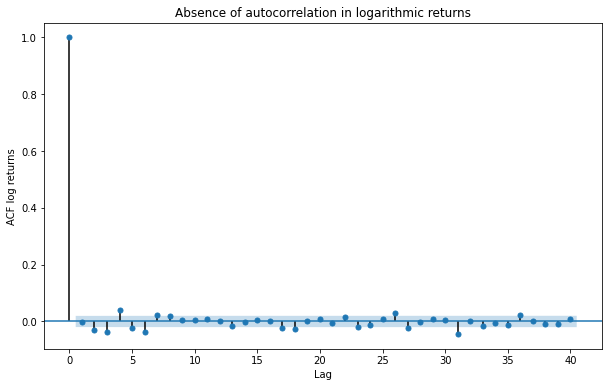

In [ ]:
absence()

In [ ]:
#ACF PLOT FOR 5 MINUTES LOG PRICE CHANGES
def absence_intraday():
    plt.rcParams["figure.figsize"] = (10, 6)
    plot_acf(intraday_ret, lags = 40)
    plt.xlabel(f'Lag')
    plt.ylabel(f'ACF intraday returns')
    plt.title("Absence of autocorrelation in 5 min returns")
    return(plt.show())

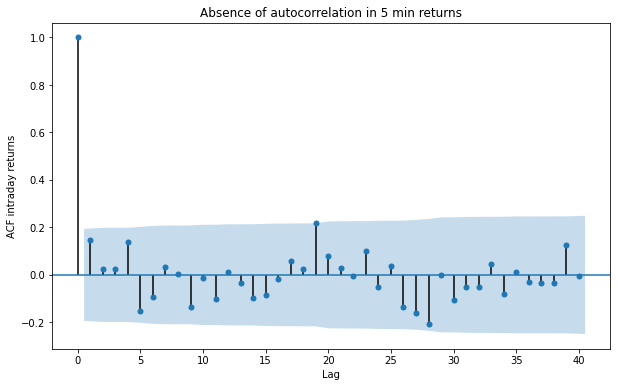

In [ ]:
absence_intraday()

# **Slow decay of autocorrelation in absolute returns:**

In [ ]:
#ACF PLOT FOR ABSOLUTE RETURNS
def slow_decay_abs(series):
    plt.rcParams["figure.figsize"] = (10, 6)
    plot_acf(series)
    plt.xlabel(f'Lag')
    plt.ylabel(f'ACF absolute returns')
    plt.title("Slow decay of autocorrelation in absolute returns")
    return(plt.show())

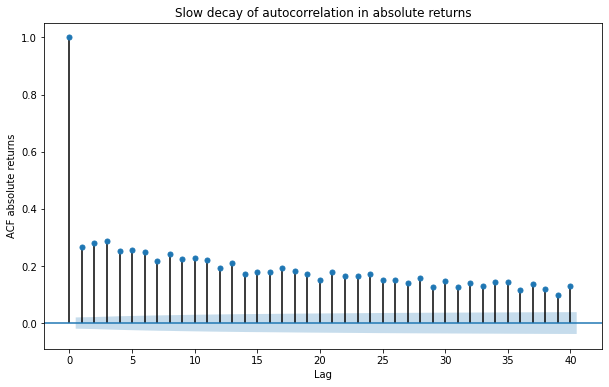

In [ ]:
slow_decay_abs(abs_ret)

# **Slow decay of autocorrelation in squared returns:**

In [ ]:
#ACF PLOT FOR SQUARED RETURNS
def slow_decay_sq(series):
    plt.rcParams["figure.figsize"] = (10, 6)
    plot_acf(series)
    plt.xlabel(f'Lag')
    plt.ylabel(f'ACF squared returns')
    plt.title("Slow decay of autocorrelation in squared returns")
    return(plt.show())

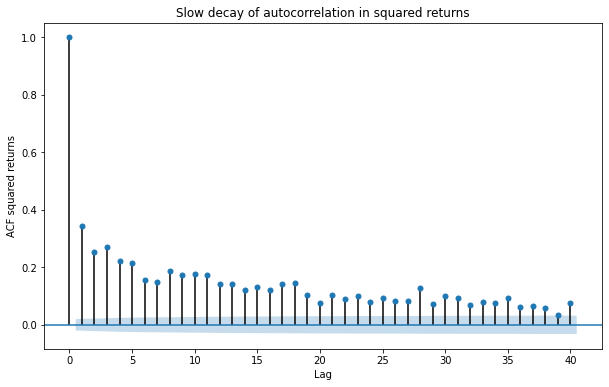

In [ ]:
slow_decay_sq(sq_ret)

# **Heavy tails**

In [ ]:
#OBSERVE THE KURTOSIS IN ORDER TO FIND THE PRESENCE OF HEAVY TAILS
kurtosis = log_ret.kurt()
fourth_moment = pd.DataFrame(['FTSE'])
fourth_moment['Kurtosis'] = kurtosis
print(fourth_moment)

      0   Kurtosis
0  FTSE  10.109354


In [ ]:
#SPLIT POSITIVE AND NEGATIVE RETURNS INTO TWO DATAFRAME
positive = log_ret[log_ret>0]
negative = abs(log_ret[log_ret<0])

In [ ]:
#FUNCTION THAT COMPARES WHICH DISTRIBUTION FITS BETTER THE DATA 
def get_best_distribution(data):
    dist_names = ["norm", "genpareto"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = stats.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

In [ ]:
get_best_distribution(positive)

p value for norm = 9.07872117329796e-105
p value for genpareto = 8.03841086796034e-31
Best fitting distribution: genpareto
Best p value: 8.03841086796034e-31
Parameters for the best fit: (0.28348738549965286, 1.5215085819623058e-05, 0.0062501947390401665)


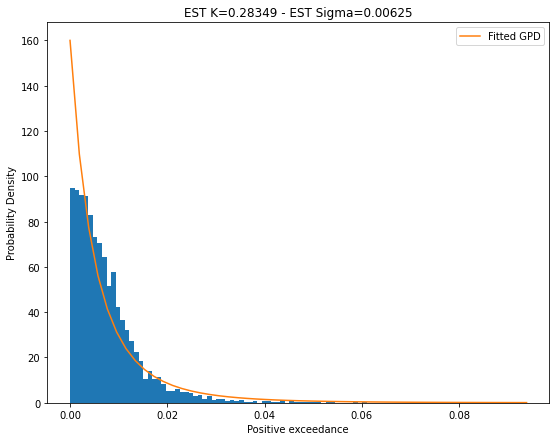

In [ ]:
#DATA PLOTTED IN A HISTOGRAM AND FITTED WITH GENPARETO DISTRIBUTION
def heavy_tails_pos():     
    fig = plt.figure(figsize=(9, 7))
    plt.hist(positive, bins=100, density=True)
    [a_fit, loc_fit, scale_fit] = stats.genpareto.fit(positive)
    x = np.linspace(np.min(positive), np.max(positive))
    plt.plot(x, stats.genpareto.pdf(x, a_fit, loc=loc_fit, scale=scale_fit), label="Fitted GPD")
    plt.xlabel("Positive exceedance")
    plt.ylabel("Probability Density")
    plt.title("EST K=0.28349 - EST Sigma=0.00625")
    plt.legend()
    plt.show

heavy_tails_pos()

In [ ]:
get_best_distribution(negative)

p value for norm = 3.39866942459106e-128
p value for genpareto = 2.6317043149131567e-20
Best fitting distribution: genpareto
Best p value: 2.6317043149131567e-20
Parameters for the best fit: (0.28494724899767987, 1.2929961695097835e-05, 0.00637605700715081)


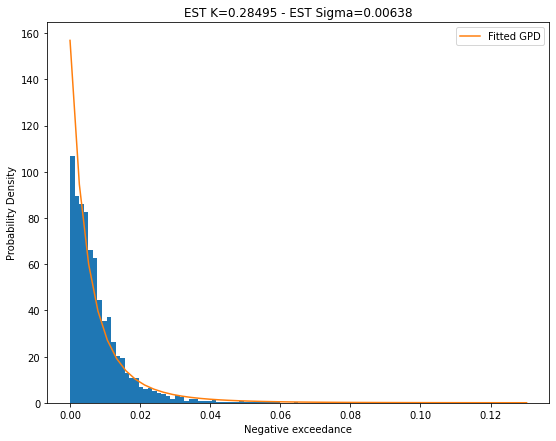

In [ ]:
def heavy_tails_neg():
    fig = plt.figure(figsize=(9, 7))
    plt.hist(negative, bins=100, density=True)
    [a_fit, loc_fit, scale_fit] = stats.genpareto.fit(negative)
    x = np.linspace(np.min(negative), np.max(negative))
    plt.plot(x, stats.genpareto.pdf(x, a_fit, loc=loc_fit, scale=scale_fit), label="Fitted GPD")
    plt.xlabel("Negative exceedance")
    plt.ylabel("Probability Density")
    plt.title("EST K=0.28495 - EST Sigma=0.00638")
    plt.legend()
    plt.show

heavy_tails_neg()

# **Gain/loss asymmetry**

In [ ]:
#TIME SERIES PLOT
def gainloss():
    fig = plt.figure(figsize=(15, 7)) 
    plt.plot(df)
    plt.title("FTSE 100 Close")
    plt.show

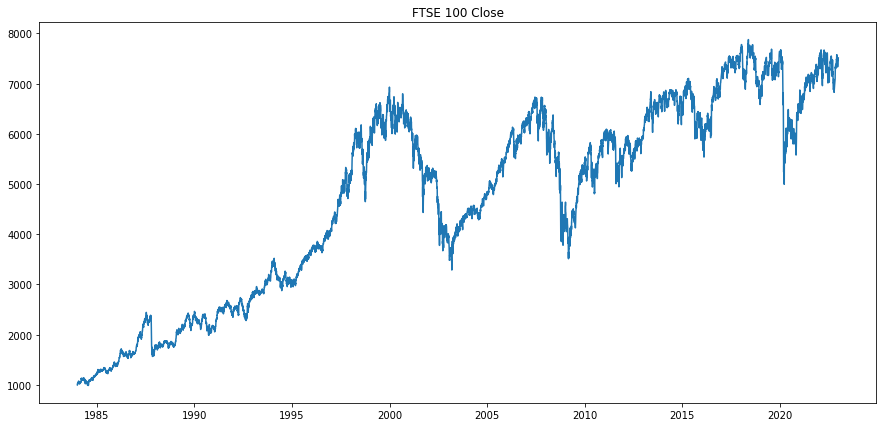

In [ ]:
gainloss()

# **Aggregational** **Gaussianity**

In [ ]:
#daily, weekly, monthly, semestry and annually returns

df_logret_w = np.log(df) - np.log(df.shift(5))
log_ret_w = df_logret_w.dropna()

df_logret_m = np.log(df) - np.log(df.shift(25))
log_ret_m = df_logret_m.dropna()

df_logret_s = np.log(df) - np.log(df.shift(125))
log_ret_s = df_logret_s.dropna()

df_logret_a = np.log(df) - np.log(df.shift(252))
log_ret_a = df_logret_a.dropna()

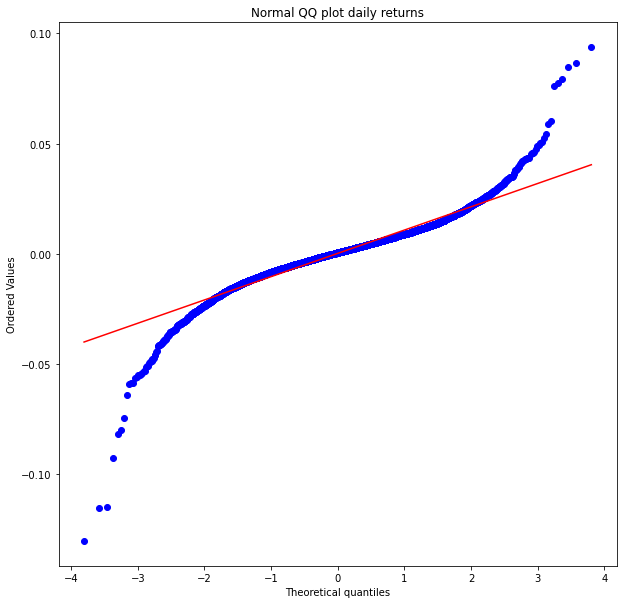

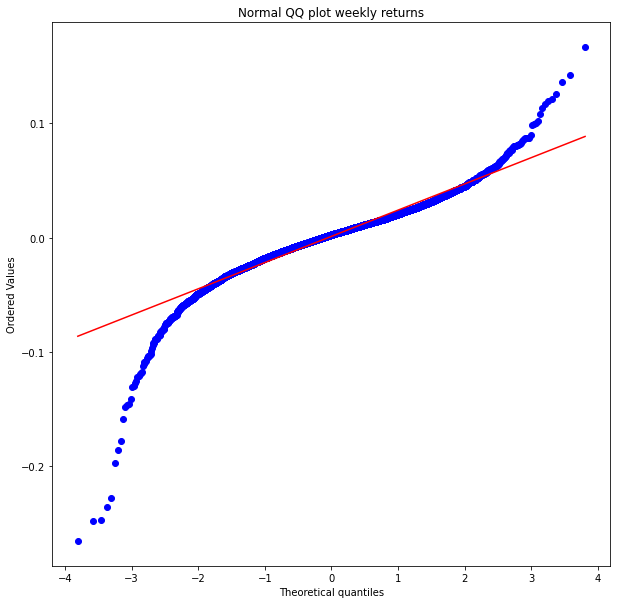

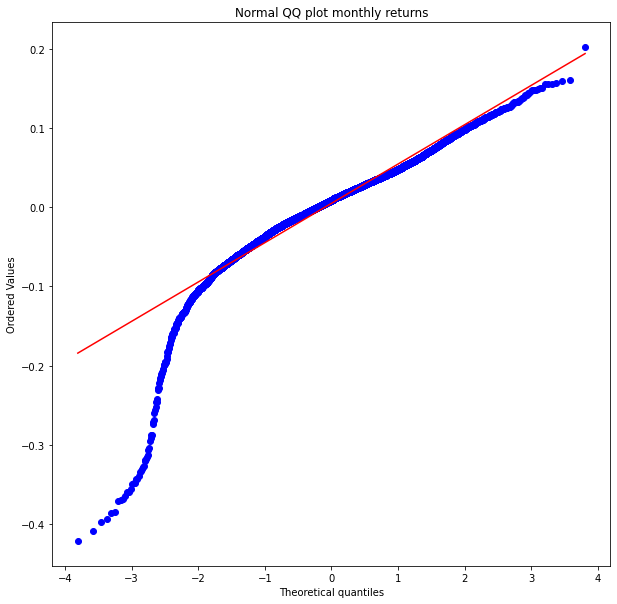

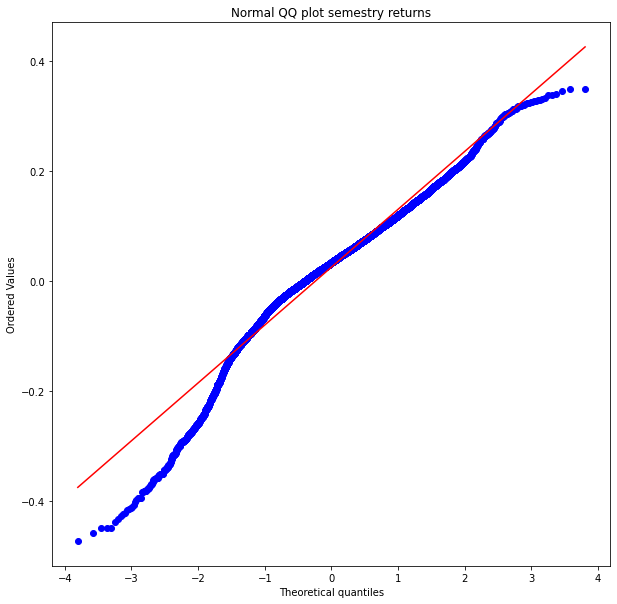

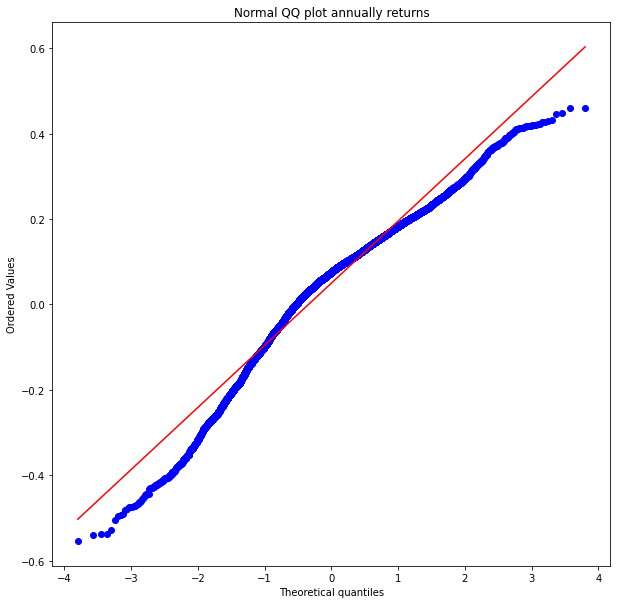

In [ ]:
#qq daily
def agg_gauss():
    fig3 = plt.figure(figsize=(10, 10))
    ax3 = fig3.add_subplot(1, 1, 1)
    ax3.set_title("daily returns")
    stats.probplot(log_ret, dist='norm', plot=ax3)
    plt.title("Normal QQ plot daily returns")
    plt.show()

#qq weekly
    fig4 = plt.figure(figsize=(10, 10))
    ax4 = fig4.add_subplot(1, 1, 1)
    ax4.set_title("weekly returns")
    stats.probplot(log_ret_w, dist='norm', plot=ax4)
    plt.title("Normal QQ plot weekly returns")
    plt.show()

#qq monthly
    fig5 = plt.figure(figsize=(10, 10))
    ax5 = fig5.add_subplot(1, 1, 1)
    ax5.set_title("monthly returns")
    stats.probplot(log_ret_m, dist='norm', plot=ax5)
    plt.title("Normal QQ plot monthly returns")
    plt.show()

#qq semestry
    fig6 = plt.figure(figsize=(10, 10))
    ax6 = fig6.add_subplot(1, 1, 1)
    ax6.set_title("semestry returns")
    stats.probplot(log_ret_s, dist='norm', plot=ax6)
    plt.title("Normal QQ plot semestry returns")
    plt.show()

#qq annually
    fig7 = plt.figure(figsize=(10, 10))
    ax7 = fig7.add_subplot(1, 1, 1)
    ax7.set_title("annually returns")
    stats.probplot(log_ret_a, dist='norm', plot=ax7)
    plt.title("Normal QQ plot annually returns")
    plt.show()

agg_gauss()

# **Intermittency**

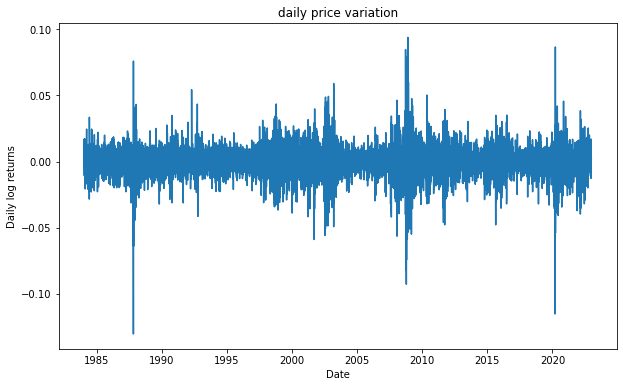

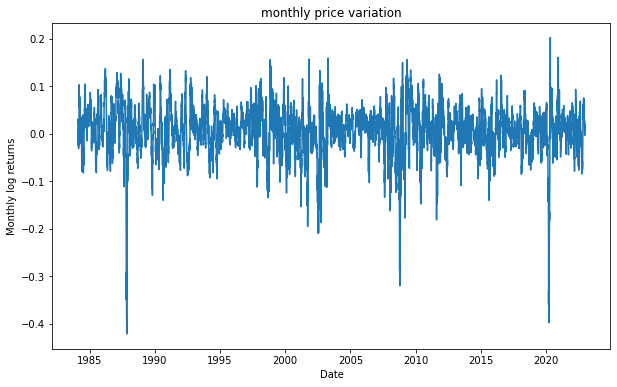

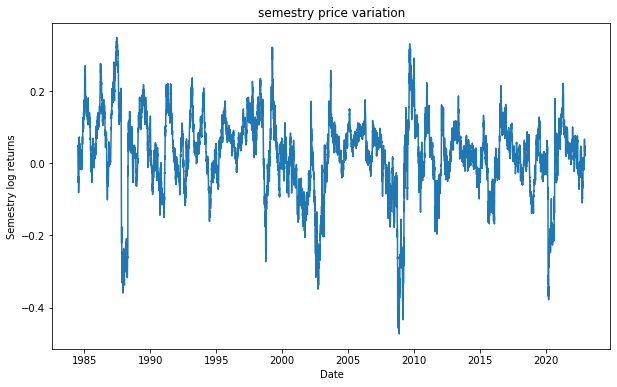

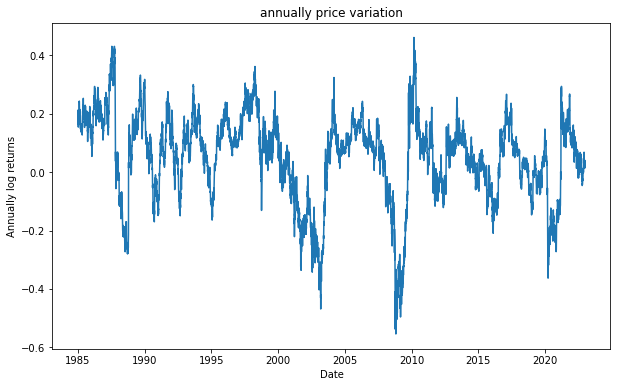

In [ ]:
#PRICE VARIATION GRAPHS
def variation():  
    plt.rcParams["figure.figsize"] = (10, 6) 
    plt.plot(log_ret)
    plt.title("daily price variation")
    plt.ylabel("Daily log returns")
    plt.xlabel("Date")
    plt.show()
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.plot(log_ret_m)
    plt.title("monthly price variation")
    plt.ylabel("Monthly log returns")
    plt.xlabel("Date")
    plt.show()
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.plot(log_ret_s)
    plt.title("semestry price variation")
    plt.ylabel("Semestry log returns")
    plt.xlabel("Date")
    plt.show()
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.plot(log_ret_a)
    plt.title("annually price variation")
    plt.ylabel("Annually log returns")
    plt.xlabel("Date")
    plt.show()

variation()

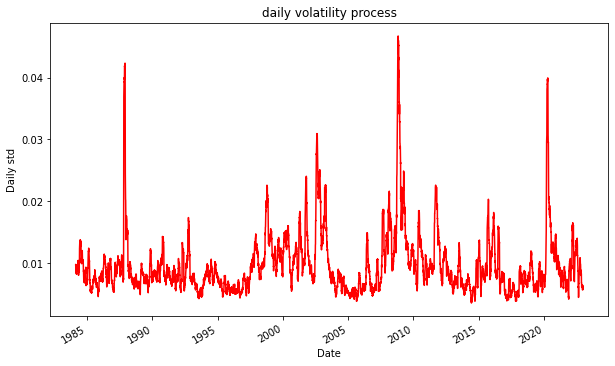

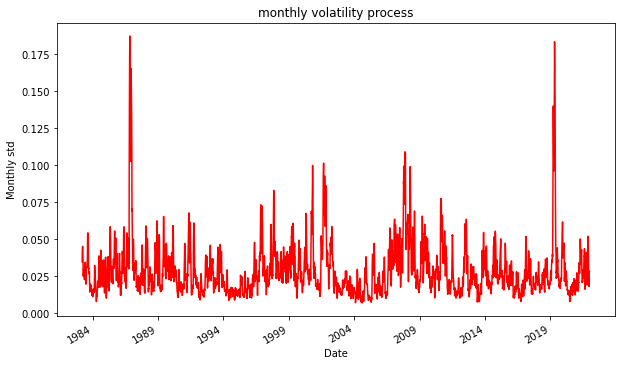

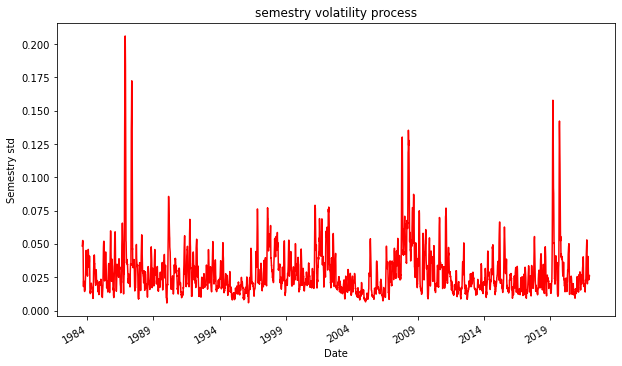

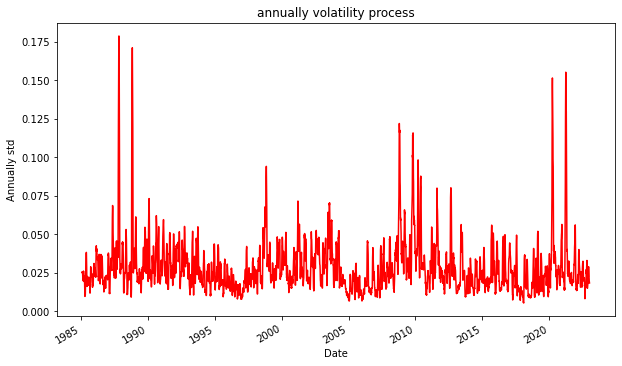

In [ ]:
#VOLATILITY PROCESS GRAPHS
d_vol = log_ret.rolling(30).std()
m_vol = log_ret_m.rolling(30).std()
s_vol = log_ret_s.rolling(30).std()
a_vol = log_ret_a.rolling(30).std()

def vol_process():
    plt.rcParams["figure.figsize"] = (10, 6)
    d_vol.plot(color="red")
    plt.title("daily volatility process")
    plt.ylabel("Daily std")
    plt.show()
    plt.rcParams["figure.figsize"] = (10, 6)
    m_vol.plot(color="red")
    plt.title("monthly volatility process")
    plt.ylabel("Monthly std")
    plt.show()
    plt.rcParams["figure.figsize"] = (10, 6)
    s_vol.plot(color="red")
    plt.title("semestry volatility process")
    plt.ylabel("Semestry std")
    plt.show()
    plt.rcParams["figure.figsize"] = (10, 6)
    a_vol.plot(color="red")
    plt.title("annually volatility process")
    plt.ylabel("Annually std")
    plt.show()

vol_process()

# **Volatility clustering**

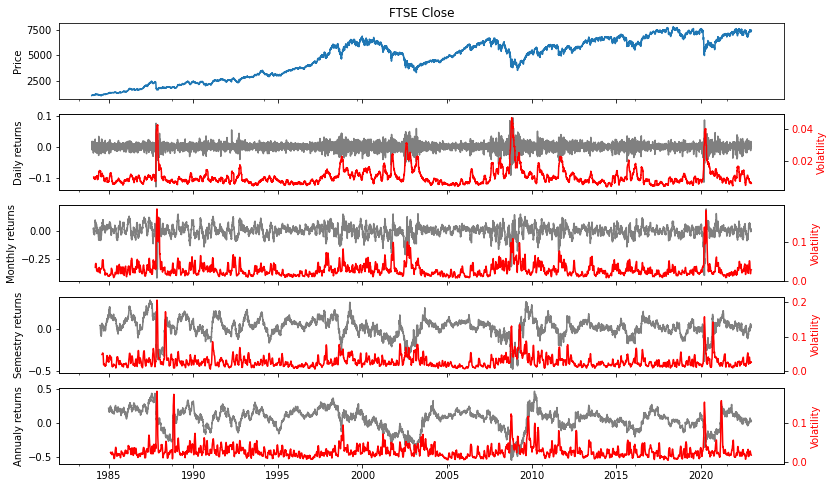

In [ ]:
def volatility_clustering():
    fig, ax = plt.subplots(5, 1, figsize=(13,9), sharex=True) 

    df.plot(ax=ax[0])
    ax[0].set(title='FTSE Close', ylabel='Price')
   
    ax[1].set_ylabel('Daily returns') 
    plot_1 = ax[1].plot(log_ret, color = 'grey') 
    ax[1].tick_params(axis ='y') 

    ax2 = ax[1].twinx() 
  
    ax2.set_ylabel('Volatility', color = 'red') 
    plot_2 = ax2.plot(d_vol, color = 'red') 
    ax2.tick_params(axis ='y', labelcolor = 'red') 
 
    ax[2].set_ylabel('Monthly returns') 
    plot_1 = ax[2].plot(log_ret_m, color = 'grey') 
    ax[2].tick_params(axis ='y') 

    ax2 = ax[2].twinx() 
  
    ax2.set_ylabel('Volatility', color = 'red') 
    plot_2 = ax2.plot(m_vol, color = 'red') 
    ax2.tick_params(axis ='y', labelcolor = 'red') 
     
    ax[3].set_ylabel('Semestry returns') 
    plot_1 = ax[3].plot(log_ret_s, color = 'grey') 
    ax[3].tick_params(axis ='y') 

    ax2 = ax[3].twinx() 
  
    ax2.set_ylabel('Volatility', color = 'red') 
    plot_2 = ax2.plot(s_vol, color = 'red') 
    ax2.tick_params(axis ='y', labelcolor = 'red') 
 
    ax[4].set_ylabel('Annualy returns') 
    plot_1 = ax[4].plot(log_ret_a, color = 'grey') 
    ax[4].tick_params(axis ='y') 

    ax2 = ax[4].twinx() 
  
    ax2.set_ylabel('Volatility', color = 'red') 
    plot_2 = ax2.plot(a_vol, color = 'red') 
    ax2.tick_params(axis ='y', labelcolor = 'red') 
    
    plt.show()

volatility_clustering()    

# **Input**

Enter the name of the stylized fact you want to check: Absence of autocorrelation in log returns


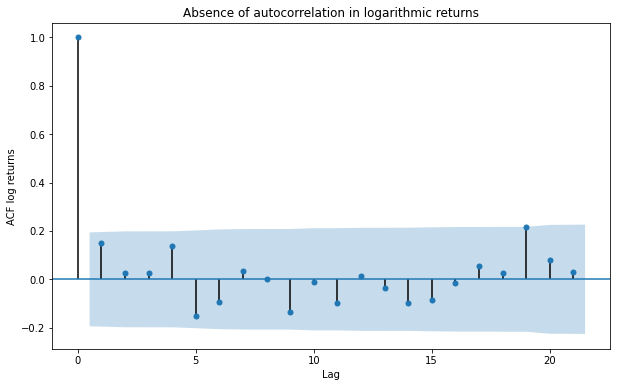

None


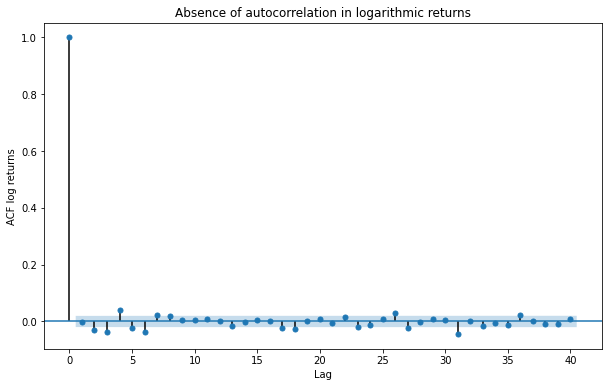

In [ ]:
sf = str(input("Enter the name of the stylized fact you want to check: "))
def GetStylizedFact():
   if sf == "Absence of autocorrelation in log returns":
     print(absence(intraday_ret))
     return(absence(log_ret))
   if sf == "Slow decay of autocorrelation in absolute returns": 
     return(slow_decay_abs(abs_ret))  
   if sf == "Slow decay of autocorrelation in squared returns":
     return(slow_decay_sq(sq_ret))
   if sf == ("Heavy tails"):
     print(heavy_tails_pos())
     return(heavy_tails_neg())
   if sf == "Aggregational Gaussianity":
     return(agg_gauss())
   if sf == "Intermittency":
     print(variation())
     return(vol_process())
   if sf == "Volatility clustering":
     return(volatility_clustering())
   else:
     print("No stylized facts to check.")

GetStylizedFact()